<a href="https://colab.research.google.com/github/ankita-0906/house-price-prediction/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1=pd.read_csv('/content/bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(['area_type','society','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [8]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

<ipython-input-8-f5ba87dc882a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [9]:
df3['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [12]:
df3.columns

Index(['location', 'total_sqft', 'bath', 'balcony', 'price', 'bhk'], dtype='object')

In [14]:
df3[df3.bhk>20]

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
df3.shape

(12710, 6)

In [17]:
def is_float(x):
  try:
    float(x)
  except:
      return False

  return True


df3[df3['total_sqft'].apply(is_float)==False]

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [18]:
df3[~df3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [19]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [20]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [21]:
df4.isnull().sum()

location       0
total_sqft    42
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [22]:
df3.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [23]:
df4[df4['total_sqft'].isnull()]

,location,total_sqft,bath,balcony,price,bhk
410,Kengeri,NaN,1.0,0.0,18.50,1
775,Basavanagara,NaN,2.0,1.0,93.00,1
1019,Marathi Layout,NaN,1.0,0.0,110.00,1
1086,Narasapura,NaN,2.0,2.0,29.50,2
1400,Chamrajpet,NaN,9.0,1.0,296.00,9
1712,Singena Agrahara,NaN,3.0,1.0,95.00,3
1743,Hosa Road,NaN,3.0,1.0,115.00,3
1821,Sarjapur,NaN,3.0,1.0,76.00,3
2881,Volagerekallahalli,NaN,2.0,2.0,38.00,2
3228,Dodda Banaswadi,NaN,5.0,1.0,140.00,5


In [24]:
df3.loc[10491]

location            Rajapura
total_sqft    86.72Sq. Meter
bath                     2.0
balcony                  2.0
price                   40.0
bhk                        2
Name: 10491, dtype: object

In [25]:
df4=df4.dropna()
df4.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [26]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [27]:
len(df5.location.unique())

1259

In [28]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              514
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          259
Thanisandra             233
                       ... 
1 Giri Nagar              1
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
whitefiled                1
Name: location, Length: 1248, dtype: int64

In [29]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Nagappa Reddy Layout    10
Thyagaraja Nagar        10
Ganga Nagar             10
Naganathapura           10
Dairy Circle            10
                        ..
1 Giri Nagar             1
Kanakapura  Rod          1
Kanakapura Main Road     1
Kanakapura Road          1
whitefiled               1
Name: location, Length: 1013, dtype: int64

In [30]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

236

In [31]:
df5.shape

(12668, 7)

In [32]:
df5 = df5[df5['location'] != 'other']
df5.shape

(9927, 7)

In [33]:
df5['sqft_per_bhk']=df5['total_sqft']/df5['bhk']
df5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606,528.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615,650.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556,480.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861,507.0
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000,600.0


In [35]:
df5.sqft_per_bhk.describe()

count     9927.000000
mean       570.689276
std        345.922725
min         15.000000
25%        482.666667
50%        557.500000
75%        623.000000
max      26136.000000
Name: sqft_per_bhk, dtype: float64

In [36]:
df6=df5[~(df5.sqft_per_bhk<200)]
df6.shape

(9776, 8)

In [37]:
df6.price_per_sqft.describe()

count     9776.000000
mean      6062.068896
std       3343.089383
min        371.428571
25%       4186.952288
50%       5250.086386
75%       6762.002342
max      76530.612245
Name: price_per_sqft, dtype: float64

In [38]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df7=remove_pps_outliers(df6)
df7.shape

(7913, 8)

In [39]:
def plot_scatter_chart(df,location):
  bhk2=df[(df.location==location)&(df.bhk==2)]
  bhk3=df[(df.location==location)&(df.bhk==3)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend()

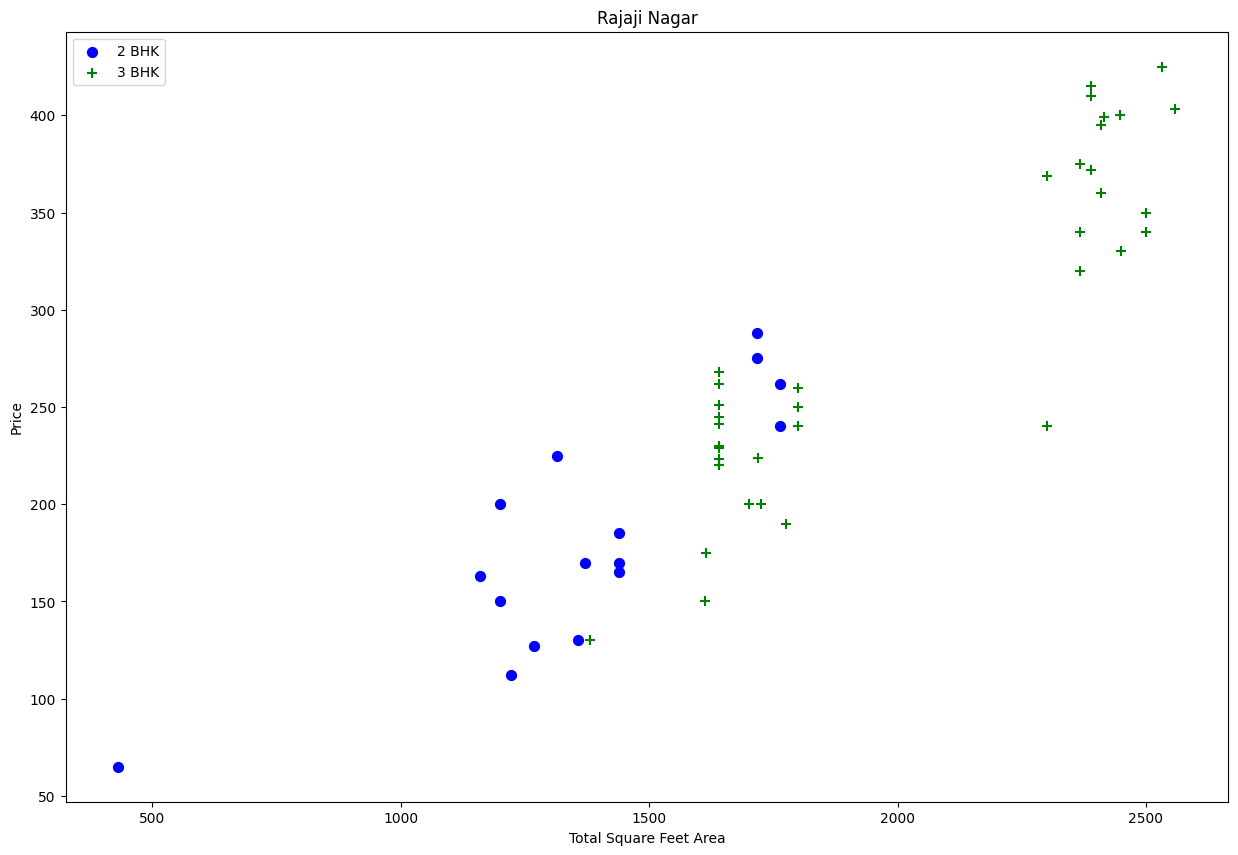

In [42]:
import matplotlib
plot_scatter_chart(df7,'Rajaji Nagar')

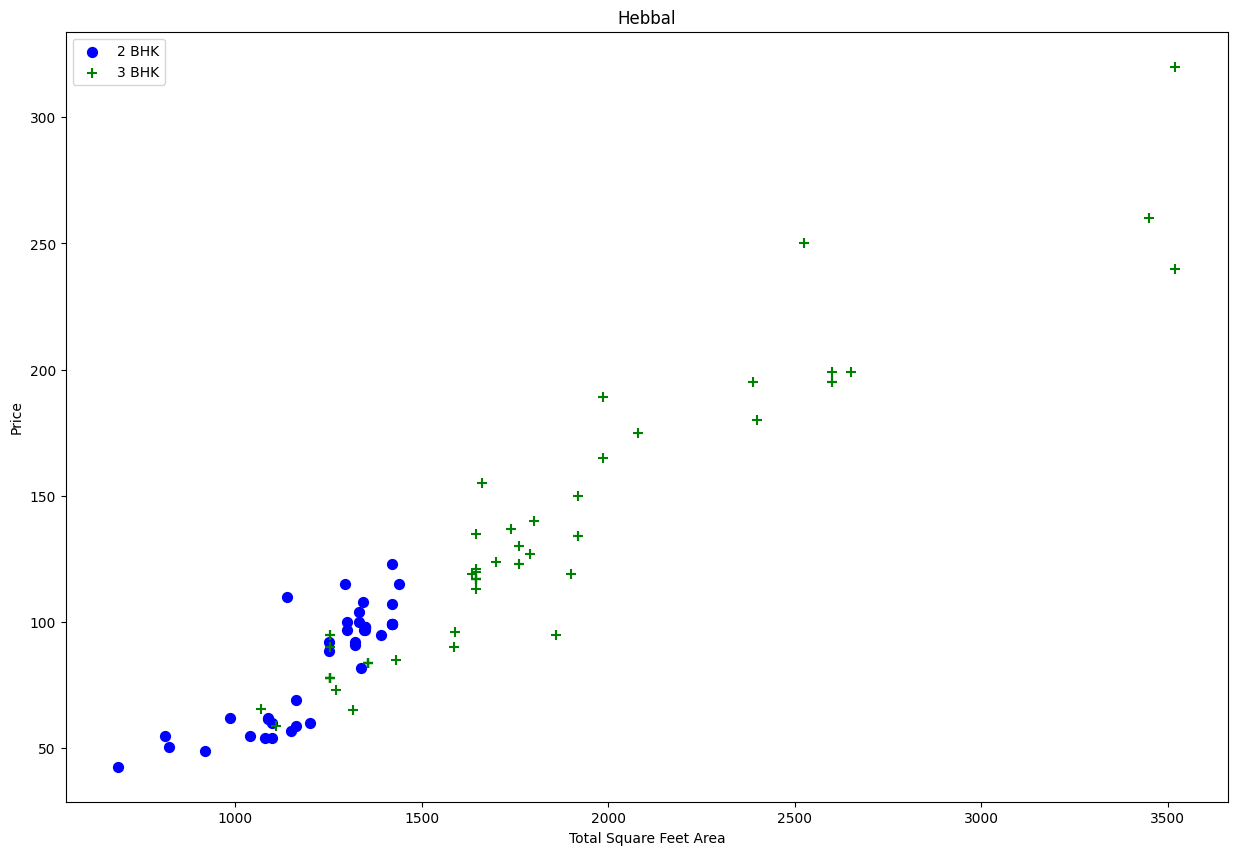

In [43]:
plot_scatter_chart(df7,'Hebbal')

In [44]:
def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
      for bhk,bhk_df in location_df.groupby('bhk'):
        stats=bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
          exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

In [45]:
df8=remove_bhk_outliers(df7)
df8.shape

(6127, 8)

In [46]:
df8.bath.unique()

array([4., 3., 6., 2., 1., 5., 8., 7., 9.])

Text(0, 0.5, 'Count')

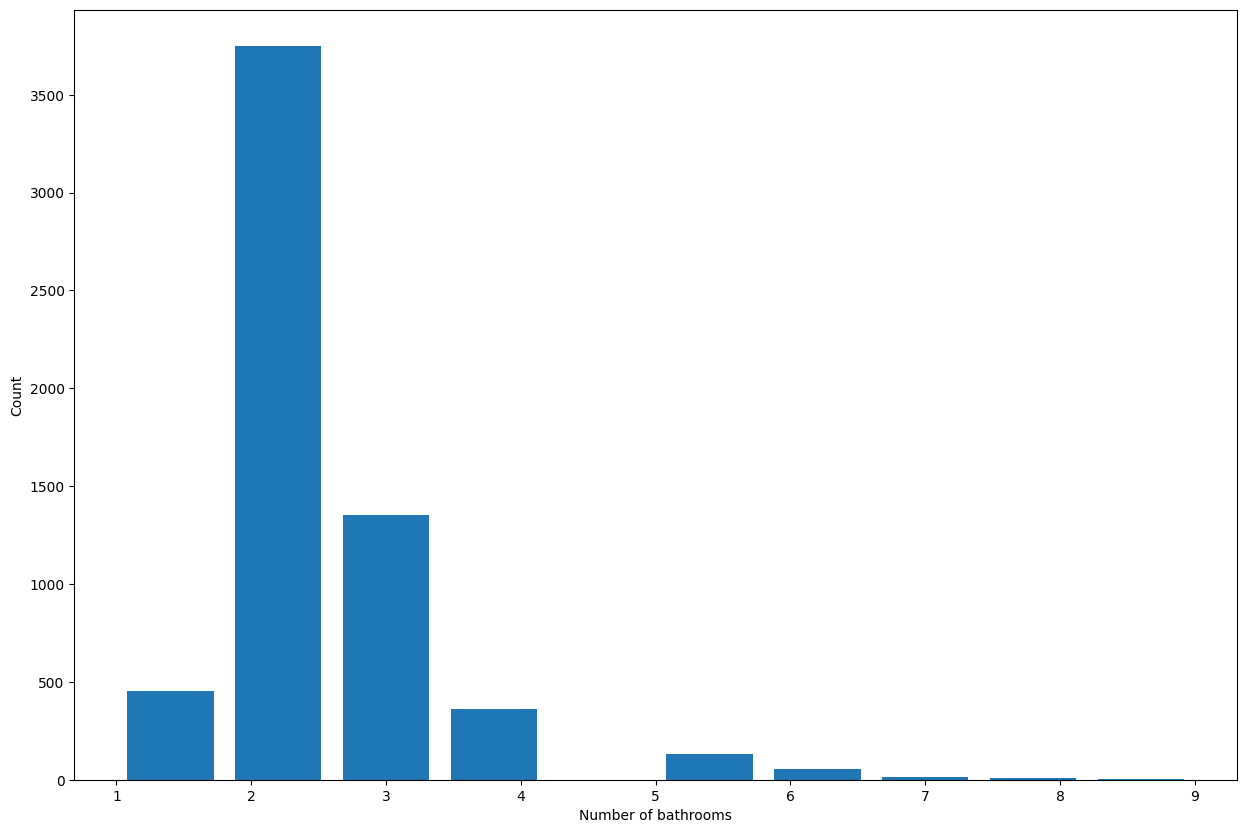

In [47]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [48]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(6075, 8)

In [49]:
df9.balcony.unique()


array([1., 2., 3., 0.])

Text(0, 0.5, 'Count')

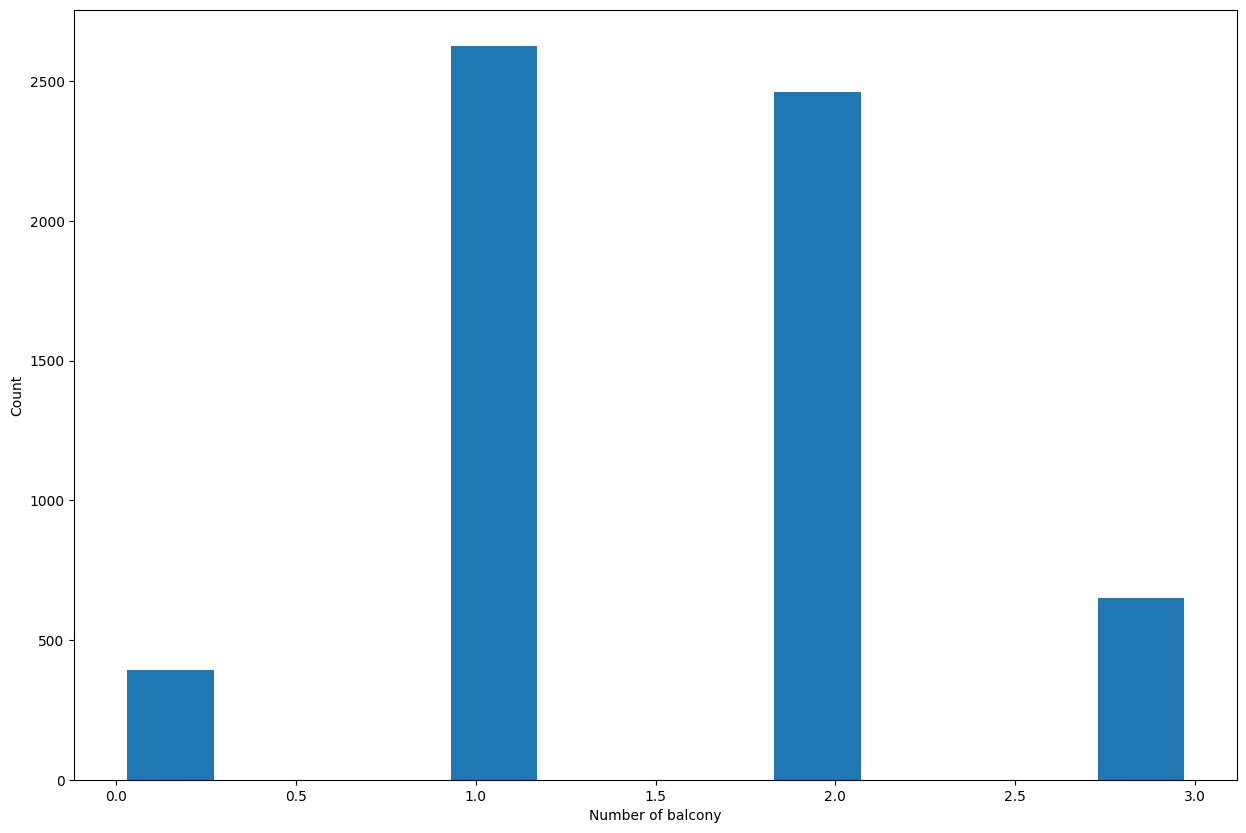

In [51]:
plt.hist(df8.balcony,rwidth=0.8)
plt.xlabel('Number of balcony')
plt.ylabel('Count')

In [58]:
pd.get_dummies(df9.location,dtype=int)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
dummies=pd.get_dummies(df9.location,dtype=int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
merged=pd.concat([df9,dummies],axis="columns")
merged

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bhk,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4,15017.543860,712.500000,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3,11901.840491,543.333333,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,2.0,125.00,6,10416.666667,200.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3,12533.333333,625.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3,10833.333333,400.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Yeshwanthpur,672.0,1.0,1.0,36.85,1,5483.630952,672.000000,0,0,...,0,0,0,0,0,0,0,0,0,1
7904,Yeshwanthpur,1195.0,2.0,2.0,100.00,2,8368.200837,597.500000,0,0,...,0,0,0,0,0,0,0,0,0,1
7907,Yeshwanthpur,2500.0,5.0,2.0,185.00,6,7400.000000,416.666667,0,0,...,0,0,0,0,0,0,0,0,0,1
7911,Yeshwanthpur,1855.0,3.0,3.0,135.00,3,7277.628032,618.333333,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
final=merged.drop(['location','price_per_sqft','sqft_per_bhk','Vishwapriya Layout'],axis='columns')
final.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,2.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.model_selection import train_test_split

In [66]:
x=final.drop(['price'],axis='columns')
y=final.price

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [68]:
len(x_train)

4860

In [69]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
model.predict(x_test)

array([ 25.85723712,  58.23376078, 128.66821265, ...,  68.99786301,
        79.46504938, 113.01106815])

In [72]:
y_test

3946     35.0
6737     75.0
6680    125.0
5579     49.0
6609     72.0
        ...  
1374    175.0
204      34.5
5799     66.0
4765     75.0
2462    125.0
Name: price, Length: 1215, dtype: float64

In [73]:
model.score(x_test,y_test)

0.8429893642322238